# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 5</span> 


In this simularion I will use the metropolis algorithm to sample the function $|\Psi_{1,0,0}(x,y,z)|^2$ and 
$|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates**, using a uniform and a multivariate Gaussian distribution as transition probability between states.
## <span style="color:red">  Theory </span> 
The function $\Psi$, in our case, represents the wave function of the eigenstates for an electron in the hydrogen atom.
The wave functions of the eigenstates of an electron in a Hydrogen atom are expressed in terms of spherical harmonics and generalized Laguerre polynomials. Usually spherical coordinates are used, and the wave function can be separated into functions of each coordinate:
$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)
$$
where $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm is the Bohr radius, $L_{n-l-1}^{2l+1}$ are the generalized Laguerre polynomials of degree $n-l-1$, $n=1,2,...$ is the principal quantum number, $l=0,1, ..., n-1$ the azimuthal quantum number, $m=-l, -l+1, ..., l-1, l$ the magnetic quantum number.

For example, the ground state wave function is:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
whereas one of the three $2p$ excited state is:
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
<span style="color:blue">Expectation values for the radius turns out to be exactly:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$
<span style="color:black">First let's visualize how the points are distributed in space, considering a uniform and a normal distribution



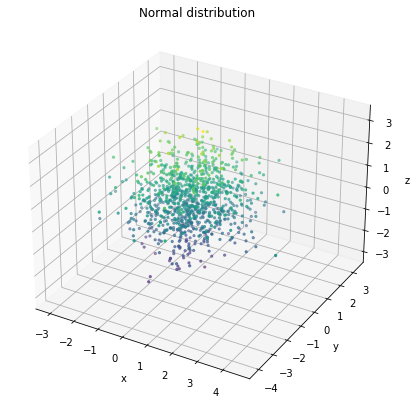

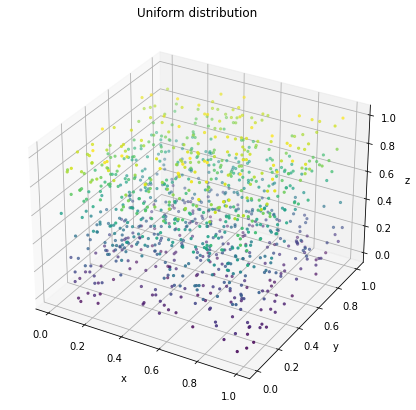

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

M=1000
X=np.random.normal(0.0,1.0,M)
Y=np.random.normal(0.0,1.0,M)
Z=np.random.normal(0.0,1.0,M)
fig= plt.figure(figsize=(14,7))
ax = fig.add_subplot(projection='3d')
ax.set_title('Normal distribution')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')




X=np.random.uniform(0.0,1.0,M)
Y=np.random.uniform(0.0,1.0,M)
Z=np.random.uniform(0.0,1.0,M)


fig1= plt.figure(figsize=(14,7))
ax1 = fig1.add_subplot(projection='3d')
ax1.set_title('Uniform distribution')
ax1.scatter(X, Y, Z, c=Z, marker='.')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

plt.show()

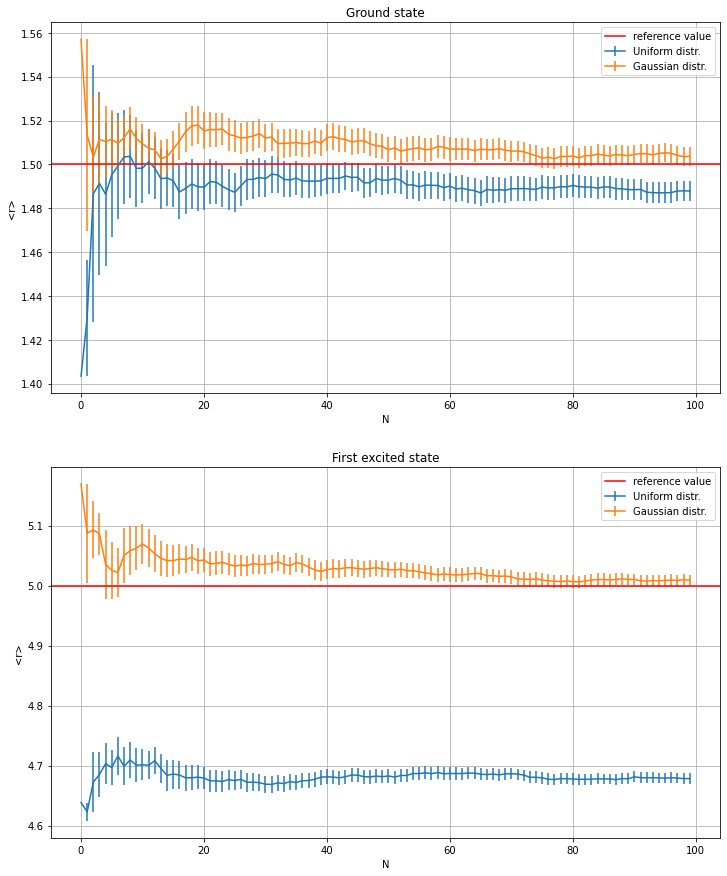

In [22]:
#load stuff & plot results 
rad_firstUniform= np.load('radGSuniform.npy')
error_radfirstUniform = np.load('ErrorGSuniform.npy')
n= len(rad_firstUniform)

rad_firstGauss= np.load('radGSgauss.npy')
error_radfirstGauss = np.load('ErrorGSgauss.npy')


rad_secondUniform= np.load('radFirstuniform.npy')
error_radsecondUniform = np.load('ErrorFirstuniform.npy')
m= len(rad_secondUniform)
rad_secondGauss= np.load('radFirstgauss.npy')
error_radsecondGauss = np.load('ErrorFirstgauss.npy')


figure, (ax1, ax2) = plt.subplots(nrows= 2, ncols=1, figsize=(12, 15))

ax1.set_title('Ground state')
ax1.errorbar(np.arange(n),rad_firstUniform, error_radfirstUniform, label='Uniform distr.')
ax1.errorbar(np.arange(n),rad_firstGauss, error_radfirstGauss, label='Gaussian distr.')
ax1.axhline(y=1.5, xmin=0, xmax=max(np.arange(n)),color='red', label='reference value')
ax1.set_xlabel('N')
ax1.set_ylabel('<r>')
ax1.legend()
ax1.grid('True')

ax2.set_title('First excited state')
ax2.errorbar(np.arange(m),rad_secondUniform, error_radsecondUniform, label='Uniform distr.')
ax2.errorbar(np.arange(m),rad_secondGauss, error_radsecondGauss, label='Gaussian distr.')
ax2.axhline(y=5.0, xmin=0, xmax=max(np.arange(n)),color='red', label='reference value')
ax2.set_xlabel('N')
ax2.set_ylabel('<r>')
ax2.legend()
ax2.grid('True')



For the ground state both results obtained with the two different distribution are substantially equivalent. On the other hand for the first excited state, the extimation of the radius is closer to the real value in the case of the gaussian distribution.

## Acceptance analysis
The choice of the step for the two cases was made so that the acceptance was $\sim 50$ % when sampling with a uniform probability distribution. Using s step of 1.1 for the ground state and  of 3.1 for the first excited state gives the desired result. All plots have on the x axis the number of MC steps.

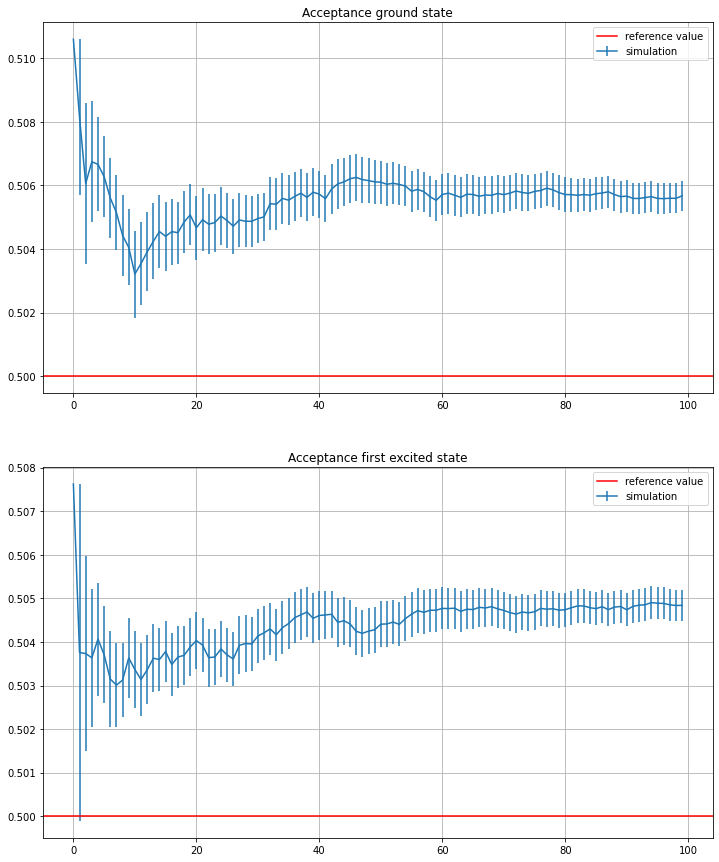

In [2]:
AcceptanceGS= np.load('AcceptanceGS.npy')
error_AcceptanceGS = np.load('ErrorGS.npy')
n= len(AcceptanceGS)

AcceptanceFirst= np.load('AcceptanceFirst.npy')
error_AcceptanceFirst = np.load('ErrorFirst.npy')
figure, (ax1, ax2) = plt.subplots(nrows= 2, ncols=1, figsize=(12, 15))

ax1.set_title('Acceptance ground state')
ax1.errorbar(np.arange(n),AcceptanceGS, error_AcceptanceGS, label= 'simulation')
ax1.axhline(y=0.5, xmin=0, xmax=max(np.arange(n)),color='red', label='reference value')
ax1.legend()
ax1.grid('True')

ax2.set_title('Acceptance first excited state')
ax2.errorbar(np.arange(n),AcceptanceFirst, error_AcceptanceFirst, label='simulation')
ax2.axhline(y=0.5, xmin=0, xmax=max(np.arange(n)),color='red', label='reference value')
ax2.legend()
ax2.grid('True')


## Change of the initial conditions

By choosing a starting point far away from the origin, the convergence to the theoretical value is slower. Moreover, if the initial point is very far away from the origin, we can experience divergence (division by $\sim$ 0) we we compute the ratio
$$
\frac{\Psi(x_{new},y_{new},z_{new})}{\Psi(x_{old},y_{old},z_{old})}
$$
This can be easily obatained by using (500,500,500) as starting point.

## Numbers of blocks/ MC steps.

Using M=1000000 Montecarlo steps gives a sufficient statistics. For what concerns the number of blocks (N), used to compute the mean values and the statistical uncertainties, a value of N=100 gives a number of 10000 points in each blocks, which is enough to compute mean values and uncertainties in each block. Nor decreasing N or increasing it gives better results.